# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [3]:
# os.getcwd() + "\\data\\seg_train"

In [4]:
os.listdir()

['Clasificador_paisajes.ipynb']

In [5]:

ROOT_PATH = "C:\\Users\\nsara\\Desktop\\clasificador_paisajes\\"

IMAGE_SIZE = (32,32)
TRAIN_PATH = ROOT_PATH+ "seg_train\\"
TEST_PATH = ROOT_PATH + "seg_test\\"

In [6]:
# IMAGE_SIZE = (32,32)
# TRAIN_PATH = os.getcwd() + "\\data\\seg_train"
# TEST_PATH = os.getcwd() + "\\data\\seg_test"

In [7]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en lectura imagen", image_path)

    return np.array(X), np.array(y)


In [8]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


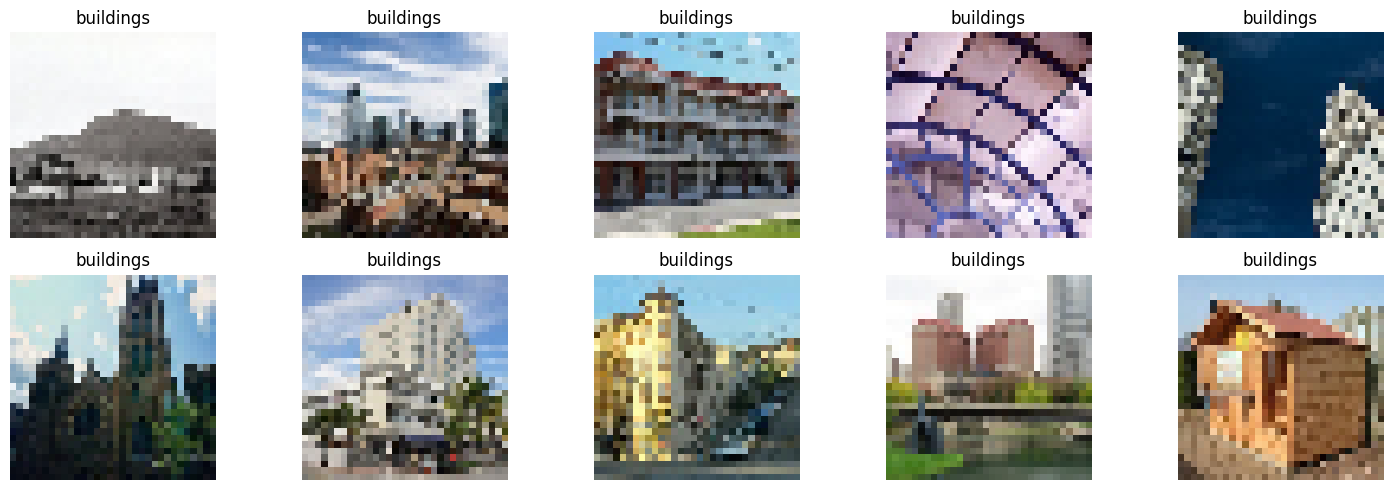

In [9]:
# Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
def plot_sample_images(X, y, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[i])
        plt.title(class_names[y[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Verifica que las imágenes se han cargado correctamente
plot_sample_images(X_train, y_train, class_names)

In [10]:
# Normalizar los datos

X_train = X_train / 255.0
X_test = X_test / 255.0


In [11]:
# Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las características
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de salida
model.add(Dense(len(class_names), activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,206 (1.20 MB)

 Trainable params: 315,206 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Reserva un 20% de los datos del entrenamiento para validar.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)

Tamaño del conjunto de entrenamiento: (11227, 32, 32, 3)
Tamaño del conjunto de validación: (2807, 32, 32, 3)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4895 - loss: 1.2833 - val_accuracy: 0.6427 - val_loss: 0.9297
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6783 - loss: 0.8527 - val_accuracy: 0.7253 - val_loss: 0.7643
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7280 - loss: 0.7369 - val_accuracy: 0.7538 - val_loss: 0.6873
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7696 - loss: 0.6345 - val_accuracy: 0.7649 - val_loss: 0.6629
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8099 - loss: 0.5402 - val_accuracy: 0.7374 - val_loss: 0.7513
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8232 - loss: 0.5005 - val_accuracy: 0.7421 - val_loss: 0.7079
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8504 - loss: 0.4227 - val_accuracy: 0.7848 - val_loss: 0.6304
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8701 - loss: 0.3685 - val_accu

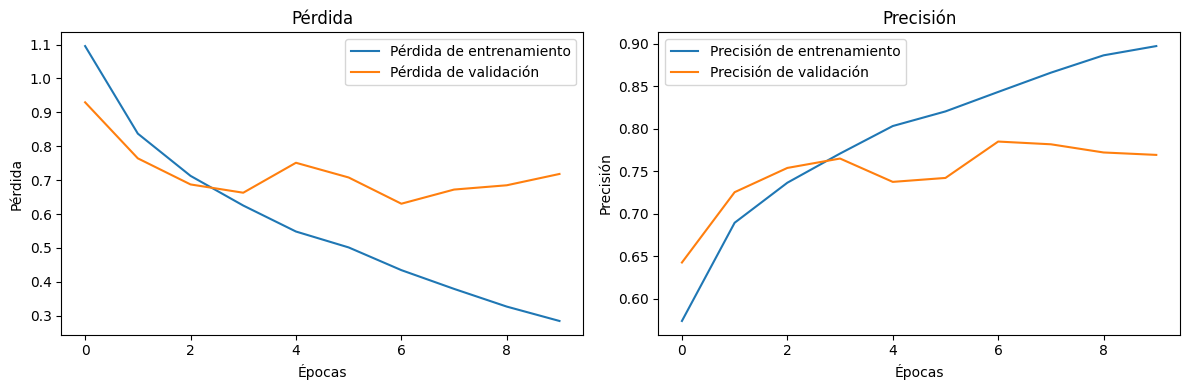

In [13]:
# Representa el objeto history

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Cambia el número de épocas según sea necesario
    batch_size=32  # Ajusta el tamaño del batch si es necesario
)

# Representar el objeto history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Gráfico de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.title('Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfico de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de validación')
    plt.title('Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [17]:
# Evalua el modelo con los datos de test
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return test_loss, test_accuracy

# Llamar a la función y mostrar los resultados
test_loss, test_accuracy = evaluate_model(model, X_test, y_test)
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7766 - loss: 0.6658
Pérdida en el conjunto de prueba: 0.7398911118507385
Precisión en el conjunto de prueba: 0.7576666474342346


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


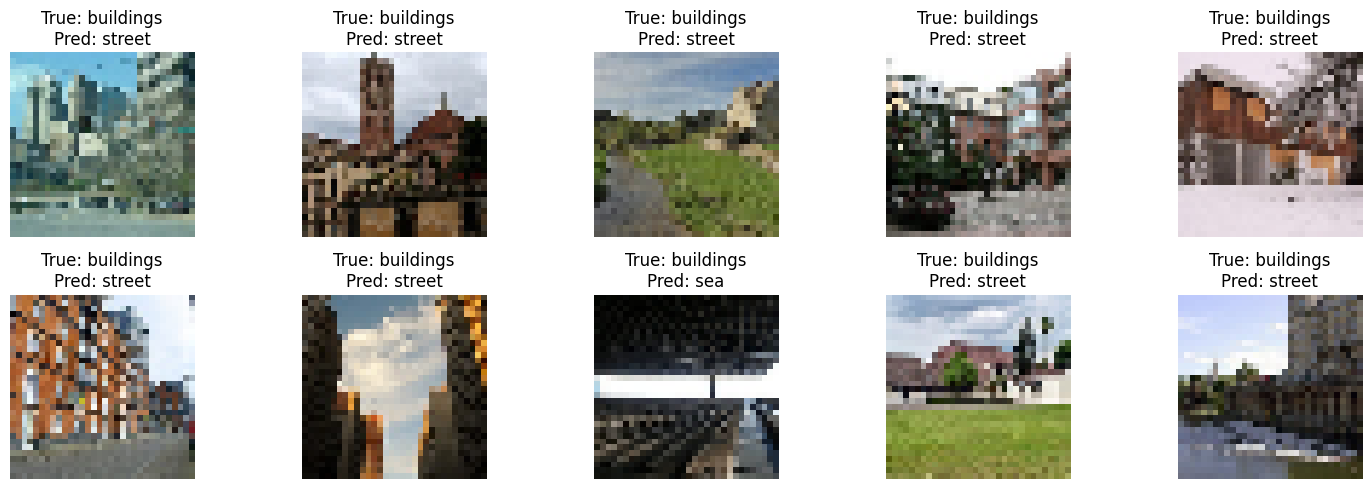

In [ ]:
# Representa algunos de los paisajes donde el modelo comete errores
# Obtener predicciones del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Identificar índices donde las predicciones son incorrectas
incorrect_indices = np.where(y_pred_classes != y_test)[0]

# Mostrar algunas imágenes donde el modelo comete errores
def plot_errors(X, y_true, y_pred, class_names, incorrect_indices, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(incorrect_indices[:num_samples]):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[idx])
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_errors(X_test, y_test, y_pred_classes, class_names, incorrect_indices)

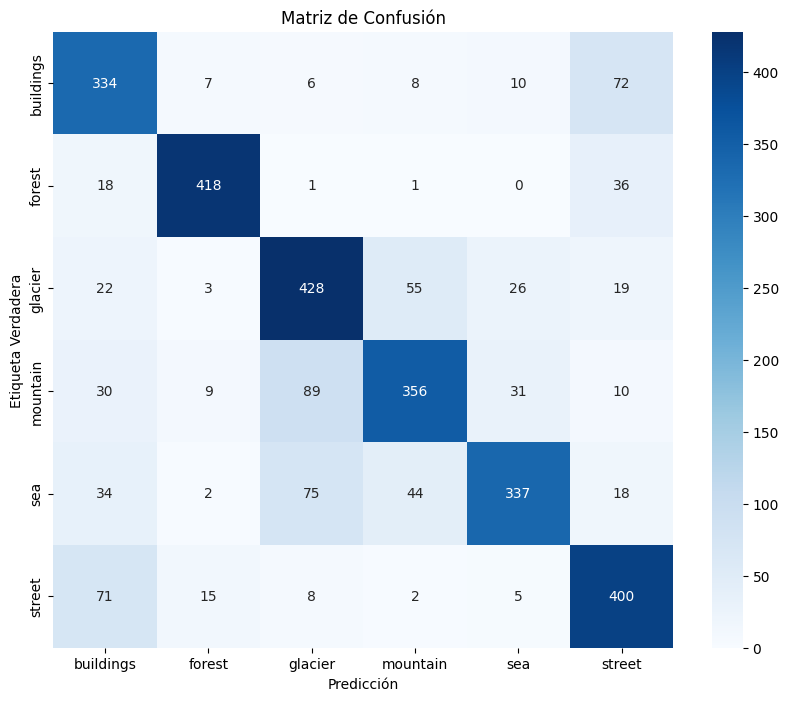

In [20]:
# Crear la matriz de confusión con los errores del modelo
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Representar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

- Mejor clasificadas: “forest” (~88 %) y “street” (~80 %) muestran las mayores tasas de acierto.
- Más difíciles: “mountain” (~68 %) y “sea” (~66 %) obtienen los peores resultados.
- Confusiones clave:
- Montañas ←→ glaciares (89 montañas como glaciares; 55 glaciares como montañas).
- Mares ←→ glaciares (75 mares como glaciares; 26 glaciares como mar).
- Edificios ←→ calles (72 edificios como calle; 71 calles como edificio).
- Causa principal: las texturas y colores similares entre pares de clases (hielo/roca, agua/hielo, asfalto/concreto) dificultan la distinción.
- Conclusión: el modelo acierta bien en clases con patrones muy distintivos, pero confunde aquellas con características visuales cercanas.